Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = ""
COLLABORATORS = ""

---

# USAGE
```python
python deep_learning_with_opencv.py --image images/jemma.png --prototxt bvlc_googlenet.prototxt --model bvlc_googlenet.caffemodel --labels synset_words.txt
```

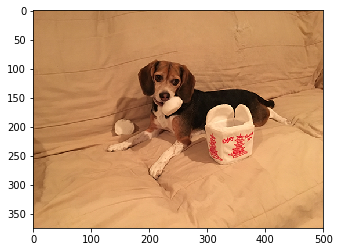

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time
import cv2

args = {
    "image": "images/jemma.png",
    "prototxt": "bvlc_googlenet.prototxt",
    "model": "bvlc_googlenet.caffemodel",
    "labels": "synset_words.txt"
}

# load the input image from disk
image = cv2.imread(args["image"])
%matplotlib inline
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

[INFO] loading model...
[INFO] classification took 0.035613 seconds
[INFO] 1. label: beagle, probability: 0.73989
[INFO] 2. label: Labrador retriever, probability: 0.083671
[INFO] 3. label: soccer ball, probability: 0.016035
[INFO] 4. label: dalmatian, probability: 0.012536
[INFO] 5. label: Walker hound, probability: 0.011524


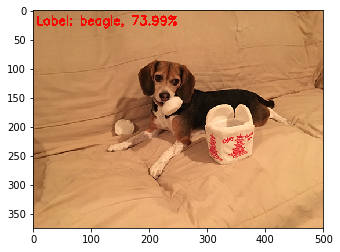

In [4]:
# load the class labels from disk
rows = open(args["labels"]).read().strip().split("\n")
classes = [r[r.find(" ") + 1:].split(",")[0] for r in rows]

# our CNN requires fixed spatial dimensions for our input image(s)
# so we need to ensure it is resized to 224x224 pixels while
# performing mean subtraction (104, 117, 123) to normalize the input;
# after executing this command our "blob" now has the shape:
# (1, 3, 224, 224)
blob = cv2.dnn.blobFromImage(image, 1, (224, 224), (104, 117, 123))

# load our serialized model from disk
print("[INFO] loading model...")
net = cv2.dnn.readNetFromCaffe(args["prototxt"], args["model"])

# set the blob as input to the network and perform a forward-pass to
# obtain our output classification
net.setInput(blob)
start = time.time()
preds = net.forward()
end = time.time()
print("[INFO] classification took {:.5} seconds".format(end - start))

# sort the indexes of the probabilities in descending order (higher
# probabilitiy first) and grab the top-5 predictions
idxs = np.argsort(preds[0])[::-1][:5]

# loop over the top-5 predictions and display them
for (i, idx) in enumerate(idxs):
    # draw the top prediction on the input image
    if i == 0:
        text = "Label: {}, {:.2f}%".format(classes[idx], 
                                           preds[0][idx] * 100)
        cv2.putText(image, text, (5, 25), 
                    cv2.FONT_HERSHEY_SIMPLEX, 
                    0.7, (0, 0, 255), 2)

    # display the predicted label + associated probability to the
    # console
    print("[INFO] {}. label: {}, probability: {:.5}"
          .format(i + 1, classes[idx], preds[0][idx]))

# display the output image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))